In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [2]:
# INSERT THE PATH OF THE FOLDER IN WHICH THE FOLLWOING FILES ARE LOCATED:
##### Low-Code.csv / mda.csv / mde.csv / mdd.csv / mba.mcsv / mbe.csv / mdse.csv 
raw_data_folder=""

In [3]:
df_lowcode = pd.read_csv(raw_data_folder+'Low-Code.csv')

In [4]:
df_mda = pd.read_csv(raw_data_folder+'mda.csv')

In [5]:
df_mde = pd.read_csv(raw_data_folder+'mde.csv')

In [6]:
df_mba = pd.read_csv(raw_data_folder+'mba.csv')

In [7]:
df_mdd = pd.read_csv(raw_data_folder+'mdd.csv')

In [8]:
df_mdse = pd.read_csv(raw_data_folder+'mdse.csv')

In [9]:
df_mbe = pd.read_csv(raw_data_folder+'mbe.csv')

In [10]:
df_lowcode.head(3)

Lens ID                                              Title  \
0  000-070-699-383-125  ECIS - Innovating with employees: an explorato...   
1  000-235-674-128-200  VL/HCC - Bringing visual languages to market: ...   
2  000-269-027-654-007  Artificial Intelligence for Social Good in Res...   

  Date Published  Publication Year        Publication Type  \
0     11/05/2021              2021  conference proceedings   
1            NaN              2018  conference proceedings   
2     19/02/2021              2021  conference proceedings   

                                        Source Title ISSNs Publisher  \
0                                               ECIS   NaN       NaN   
1  IEEE Symposium on Visual Languages and Human-C...   NaN      IEEE   
2         World Conference on Teaching and Education   NaN   ACAVENT   

  Source Country                                       Author/s  ... PMID  \
0            NaN  Désirée Krejci; Satu Iho; Stéphanie Missonier  ...  NaN   
1            NaN                         Rodrigo Sousa Coutinho  ...  NaN   
2            NaN                                 Meng Leong How  ...  NaN   

                                DOI Microsoft Academic ID PMCID  \
0                               NaN          3.176178e+09   NaN   
1        10.1109/vlhcc.2018.8506500          2.898572e+09   NaN   
2  10.33422/2nd.worldcte.2021.01.08          3.202690e+09   NaN   

  Citing Patents Count References Citing Works Count Is Open Access  \
0                    0        NaN                  0          False   
1                    0        NaN                  2          False   
2                    0        NaN                  4           True   

   Open Access License Open Access Colour  
0                  NaN                NaN  
1                  NaN                NaN  
2                  NaN             bronze  

[3 rows x 32 columns]

In [11]:
dataframes = [df_lowcode, df_mda, df_mdd, df_mde, df_mba, df_mdse, df_mbe]
labels = ['Low-Code', 'Model-Driven Architecture', 'Model-Driven Development', 'Model-Driven Engineering', 'Model-Based Architecture', 'Model-Driven Software Engineering', 'Model-Based Engineering']

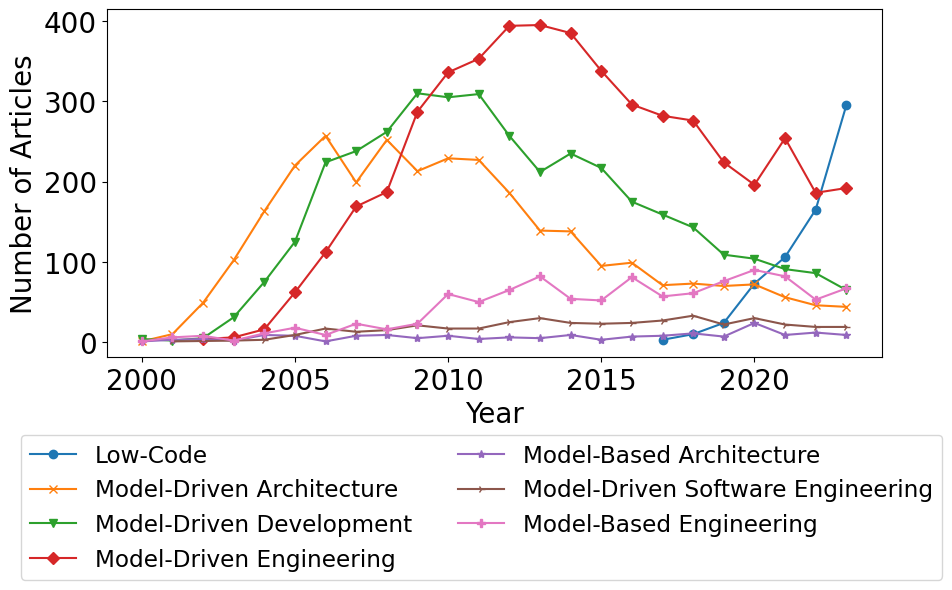

In [12]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
markers = ['o', 'x', 'v', 'D', '*', '4', 'P']

# Create a single figure for plotting
fig, ax = plt.subplots(figsize=(10, 6))

for d, l, m in zip(dataframes, labels, markers):
    d = d[d['Publication Year'] >= 2000]
    d = d[d['Publication Year'] < 2024]
    years = d.groupby('Publication Year').size().reset_index(name='Counts')
    ax.plot(years['Publication Year'], years['Counts'], marker=m, linestyle='-', label=l)

# Adding titles and labels
plt.xlabel('Year')
plt.ylabel('Number of Articles')

# Adjust the subplot to add space at the bottom
fig.subplots_adjust(bottom=0.3)

# Place the legend outside the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.19), ncol=2, fontsize='small')

# Show plot
plt.show()
fig.savefig('number_of_publications.pdf', format='pdf', dpi=1200, bbox_inches='tight')


In [13]:
# Merge DataFrames on the 'key' column
df_model = pd.concat([df_mda,df_mde,df_mba,df_mdd, df_mdse, df_mbe])

# Remove duplicates based on the 'key' column
df_model = df_model.drop_duplicates(subset=['Lens ID'])

# Reset the indices
df_model.reset_index(drop=True, inplace=True)

In [14]:
intersection_df_merge = pd.merge(df_model, df_lowcode, how='inner', on='Lens ID')
intersection_df_merge.rename(columns={'Publication Year_x': 'Publication Year'}, inplace=True)

In [15]:
# Create a boolean mask where 'Lens ID' in df1 is not in df2
mask = ~df_lowcode['Lens ID'].isin(df_model['Lens ID'])

# Apply the mask to filter df1
filtered_lowcode = df_lowcode[mask]

# Reset the indices
filtered_lowcode.reset_index(drop=True, inplace=True)

In [16]:
# Create a boolean mask where 'Lens ID' in df1 is not in df2
mask = ~df_model['Lens ID'].isin(df_lowcode['Lens ID'])

# Apply the mask to filter df1
filtered_model = df_model[mask]

# Reset the indices
filtered_model.reset_index(drop=True, inplace=True)

{'Low-Code': array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   3,  10,  23,  63,  98, 145, 277]), 'Both': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, 10,  8, 20, 17]), 'MDA/MDE/MDD\n/MBA/MDSE/MBE': array([  5,   7,  20,  68, 138, 260, 414, 576, 611, 708, 807, 906, 922,
       895, 824, 813, 705, 653, 589, 567, 487, 490, 482, 364, 368])}


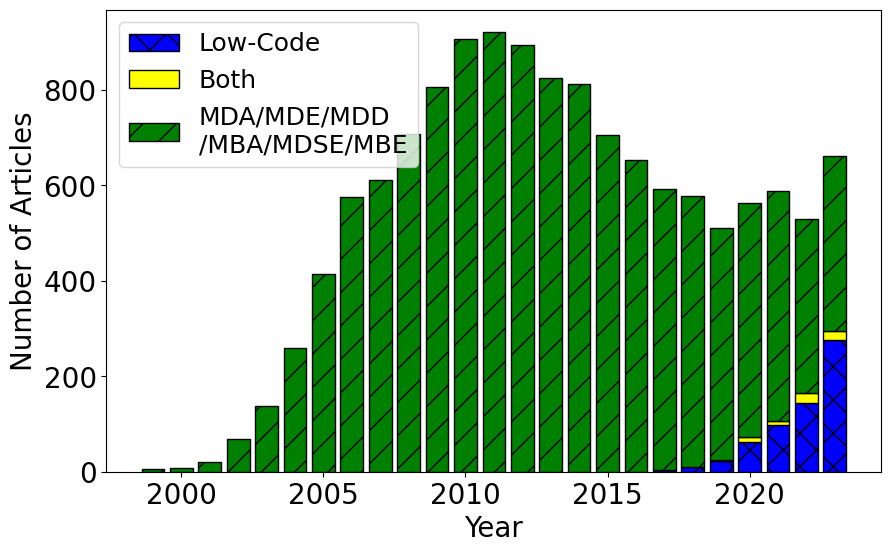

In [17]:
plt.rcParams.update({'font.size': 20})

# Create a single figure for plotting
fig, ax = plt.subplots(figsize=(10, 6))

patterns = [ "x" , "", "/" ]
colors = ['blue', '#FFFF00', '#008000']
edgecolor = ['black', 'black', 'black']

labels = ['Low-Code', 'Both', 'MDA/MDE/MDD\n/MBA/MDSE/MBE']
dataframes = [filtered_lowcode, intersection_df_merge, filtered_model]

# Get the current year
current_year = 2023  # Assuming the current year is 2024

# Get the last 24 years
last_24_years = np.arange(current_year - 24, current_year + 1)

# Initialize a dictionary to store counts for each label
counts_dict = {l: np.zeros_like(last_24_years) for l in labels}

# Iterate through dataframes and labels
for d, l in zip(dataframes, labels):
    # Filter data for the last 24 years
    d_filtered = d[d['Publication Year'].isin(last_24_years)]
    d_filtered = d_filtered[d_filtered['Publication Year'] < 2024]
    # Group data by Publication Year and count articles
    years = d_filtered.groupby('Publication Year').size().reindex(last_24_years, fill_value=0)
    # Store counts in the dictionary
    counts_dict[l] += years.values

print(counts_dict)
# Plot stacked bars
bottom = np.zeros_like(last_24_years)
for l, p, c, e in zip(labels, patterns, colors, edgecolor):
    ax.bar(last_24_years, counts_dict[l], label=l, bottom=bottom, hatch=p, color=c, edgecolor=e)
    bottom += counts_dict[l]

# Adding titles and labels
#plt.title('Number of Articles per Modeling Paradigm')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

# Add legend
plt.legend(fontsize=18)

# Show plot
plt.show()
fig.savefig('lowcode_vs_modeling.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [18]:
counts_dict

{'Low-Code': array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   3,  10,  23,  63,  98, 145, 277]),
 'Both': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 10,  8, 20, 17]),
 'MDA/MDE/MDD\n/MBA/MDSE/MBE': array([  5,   7,  20,  68, 138, 260, 414, 576, 611, 708, 807, 906, 922,
        895, 824, 813, 705, 653, 589, 567, 487, 490, 482, 364, 368])}